In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os
import numpy as np
from PIL import Image

In [3]:
def myFig(img, label) :
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    if len(label)>0 :
        for _ in range(len(label)):
            
            # Create a Rectangle patch
            dw = img.shape[1]
            dh = img.shape[0]

            x1 = (label[_][0] - label[_][2] / 2) * dw
            y1 = (label[_][1] - label[_][3] / 2) * dh
            w = label[_][2] * dw
            h = label[_][3] * dh
            rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

    plt.show()

(1400, 2240, 3)
[(0.8412894166446001, 0.6668088490777526, 0.25087957647123527, 0.20929146294930034, 0.0), (0.74793059942482, 0.30733809480403945, 0.402990986662476, 0.22831063869178236, 0.0), (0.33550609702417805, 0.6630033962737197, 0.17777814537769862, 0.18099803138641524, 0.0), (0.3245405796946974, 0.4393455108489852, 0.39120097753280625, 0.3424499113644713, 0.0), (0.32669109160984794, 0.7197883069989146, 0.6533821832196959, 0.4972702681633894, 1.0), (0.31398936130295374, 0.43191483763480365, 0.6279787226059075, 0.5907279407808839, 2.0)]


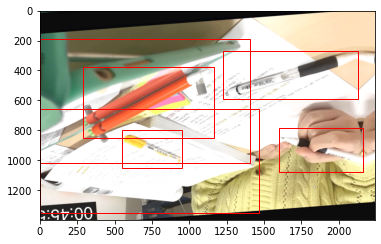

In [5]:
img_path = 'vd9_1.jpg'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bboxes = np.loadtxt(fname='vd9_1.txt', delimiter=" ",ndmin=2)
bboxes = np.roll(bboxes, 4, axis=1).tolist()

transform = A.Compose([
    A.RandomRotate90(),
    A.Transpose(),
    
    A.OneOf([
        A.IAAAdditiveGaussianNoise(),
        A.GaussNoise(),
    ], p=.2),
    
    A.ShiftScaleRotate(shift_limit=.0625, scale_limit=.5,rotate_limit=45, p=.75),
    
    A.OneOf([
        A.MotionBlur(p=.2),
        A.MedianBlur(blur_limit=3,p=.1),
        A.Blur(blur_limit=3,p=.1)
    ], p=.2),
    
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.IAASharpen(),
        A.IAAEmboss(),
        A.RandomBrightnessContrast(),], p=.3),
    A.HueSaturationValue(p=.3),
],bbox_params=A.BboxParams(format="yolo", min_visibility=0.4, label_fields=[],))

transformed = transform(image=image, bboxes=bboxes)
transformed_image = transformed['image'] #<= save
transformed_bboxes = transformed['bboxes']

print(transformed_image.shape)
print(transformed_bboxes) # <= save
myFig(transformed_image,transformed_bboxes)

filename='a'
im = Image.fromarray(transformed_image,'RGB')
path='output/'
im.save(path+filename+'.jpg')

file = open(path+filename+'.txt', "w")
l = ''
for i in transformed_bboxes:
    for n,j in enumerate(i):
        l += str(j)+' '
    l += '\n'
    
file.write(l)
file.close()

In [25]:
# def create_folder_if_not_exists(directory):
#     try:
#         if not os.path.exists(directory):
#             os.makedirs(directory)
#     except OSError:
#         print('Error: Creating directory. ' + directory)
        
# def save_images(images, save_path):
#     file = open(os.path.join(save_path,"a"+".jpg"), "wb")
#     file.write(images)
#     print("img save " + save_path+"a"+".jpg")